In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#import data file 
malldata = pd.read_csv('Largest-Malls.csv')
#view the data
malldata.head()

,Rank,Mall,Country,City (metropolitan area),Year opened,Gross leasable area (GLA),Shops
0,1,Iran Mall,Iran,Tehran,2018,"1,950,000 m2 (21,000,000 sq ft)","2,500"
1,2,IOI City Mall,Malaysia,Putrajaya,2014,"821,000 m2 (8,840,000 sq ft)",650
2,3,South China Mall,China,Dongguan,2005,"659,612 m2 (7,100,000 sq ft)","2,350"
3,4,Isfahan City Center,Iran,Isfahan,2012,"650,000 m2 (7,000,000 sq ft)",350
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,"589,891 m2 (6,349,530 sq ft)","3,500"


In [6]:
malldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Rank                       56 non-null     int64 
 1   Mall                       56 non-null     object
 2   Country                    56 non-null     object
 3   City (metropolitan area)   56 non-null     object
 4   Year opened                56 non-null     object
 5   Gross leasable area (GLA)  56 non-null     object
 6   Shops                      56 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.2+ KB


In [7]:
malldata.describe()

,Rank
count,56.000000
mean,27.642857
std,15.753128
min,1.000000
25%,14.750000
50%,28.500000
75%,42.250000
max,50.000000


In [8]:
# Assuming your dataset is named 'malldata'

# Create a dictionary to store the new column names
new_column_names = {}
for column in malldata.columns:
    new_column_names[column] = '_'.join(column.split())

# Rename the columns using the dictionary
malldata.rename(columns=new_column_names, inplace=True)
malldata

,Rank,Mall,Country,City_(metropolitan_area),Year_opened,Gross_leasable_area_(GLA),Shops
0,1,Iran Mall,Iran,Tehran,2018,"1,950,000 m2 (21,000,000 sq ft)","2,500"
1,2,IOI City Mall,Malaysia,Putrajaya,2014,"821,000 m2 (8,840,000 sq ft)",650
2,3,South China Mall,China,Dongguan,2005,"659,612 m2 (7,100,000 sq ft)","2,350"
3,4,Isfahan City Center,Iran,Isfahan,2012,"650,000 m2 (7,000,000 sq ft)",350
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,"589,891 m2 (6,349,530 sq ft)","3,500"
5,6,SM Tianjin,China,Tianjin,2016,"565,000 m2 (6,080,000 sq ft)","1,000"
6,7,Golden Resources Mall,China,Beijing,2004,"557,419 m2 (6,000,010 sq ft)",750
7,8,Central WestGate,Thailand,Nonthaburi (Bangkok Metropolitan Region),2015,"550,278 m2 (5,923,140 sq ft)",500
8,9,CentralWorld,Thailand,Bangkok,1990,"550,000 m2 (5,900,000 sq ft)",600
9,10,ICONSIAM,Thailand,Bangkok,2018,"525,000 m2 (5,650,000 sq ft)",550


As we can see, the column names are in an incorrect format. Therefore, I have decided to add underscores (_) into the middle of the names

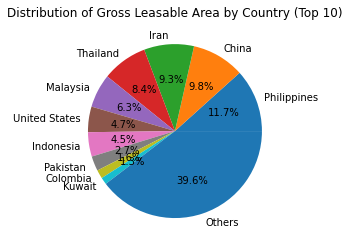

In [9]:

# Convert 'Gross_leasable_area_(GLA)' column to string type
malldata['Gross_leasable_area_(GLA)'] = malldata['Gross_leasable_area_(GLA)'].astype(str)

# Preprocess the 'Gross_leasable_area_(GLA)' column
malldata['Gross_leasable_area_(GLA)'] = malldata['Gross_leasable_area_(GLA)'].str.replace(',', '')
malldata['Gross_leasable_area_(GLA)'] = malldata['Gross_leasable_area_(GLA)'].str.extract('(\d+)', expand=False)
malldata['Gross_leasable_area_(GLA)'] = pd.to_numeric(malldata['Gross_leasable_area_(GLA)'])

# Group the data by 'Country' and calculate the sum of 'Gross_leasable_area_(GLA)' for each country
grouped_data = malldata.groupby('Country')['Gross_leasable_area_(GLA)'].sum().reset_index()

# Sort the grouped data by 'Gross_leasable_area_(GLA)' column in descending order
sorted_data = grouped_data.sort_values('Gross_leasable_area_(GLA)', ascending=False)

# Get the top 3 categories
top_10 = sorted_data.head(10)

# Calculate the sum of 'Gross_leasable_area_(GLA)' for the remaining categories
others_sum = sorted_data.iloc[3:, :]['Gross_leasable_area_(GLA)'].sum()

# Create a new dataframe for top 3 categories and 'Others'
plot_data = pd.concat([top_10, pd.DataFrame({'Country': ['Others'], 'Gross_leasable_area_(GLA)': [others_sum]})])

# Create the pie chart
plt.pie(plot_data['Gross_leasable_area_(GLA)'], labels=plot_data['Country'], autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Gross Leasable Area by Country (Top 10)')

# Show the chart
plt.show()



In this process, I would like to analyze the data in terms of the gross leasable area by country, focusing only on the top 10 countries with the largest areas in descending order

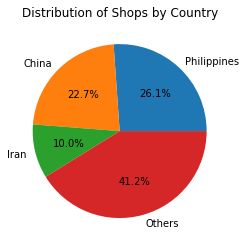

In [10]:
# Remove commas from 'Shops' column
malldata['Shops'] = malldata['Shops'].str.replace(',', '')

# Convert 'Shops' column to numeric
malldata['Shops'] = pd.to_numeric(malldata['Shops'])

# Group the data by 'Country' and calculate the sum of 'Shops' for each country
grouped_data = malldata.groupby('Country')['Shops'].sum().reset_index()

# Sort the grouped data by 'Shops' column in descending order
sorted_data = grouped_data.sort_values('Shops', ascending=False)

# Get the top 3 categories
top_3 = sorted_data.head(3)

# Calculate the sum of 'Shops' for the remaining categories
others_sum = sorted_data.iloc[3:, :]['Shops'].sum()

# Create a new dataframe for top 3 categories and 'Others'
plot_data = pd.concat([top_3, pd.DataFrame({'Country': ['Others'], 'Shops': [others_sum]})])

# Create the pie chart
plt.pie(plot_data['Shops'], labels=plot_data['Country'], autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Shops by Country')

# Show the chart
plt.show()

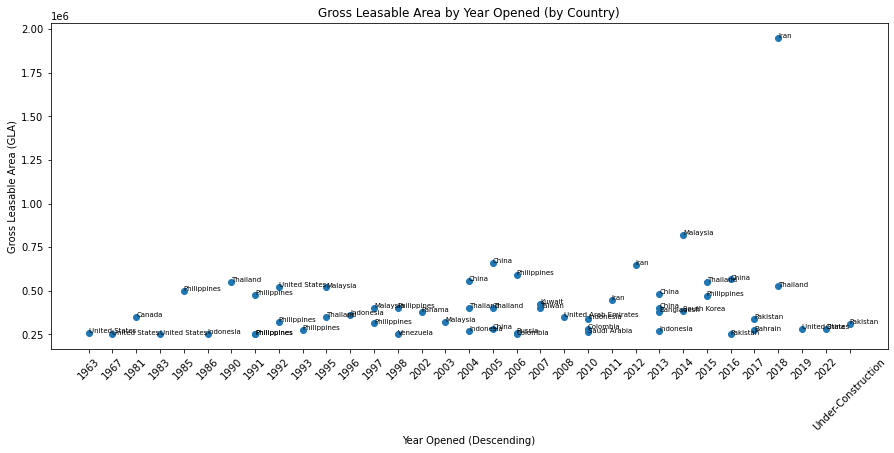

In [11]:

# Extract the relevant columns
scatter_data = malldata[['Country', 'Year_opened', 'Gross_leasable_area_(GLA)']]

# Sort the data by 'Year_opened' in descending order
scatter_data = scatter_data.sort_values('Year_opened', ascending=False)

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the scatter graph
plt.scatter(scatter_data['Year_opened'], scatter_data['Gross_leasable_area_(GLA)'])

# Add labels to each point representing the country
for i, country in enumerate(scatter_data['Country']):
    plt.annotate(country, (scatter_data['Year_opened'].iloc[i], scatter_data['Gross_leasable_area_(GLA)'].iloc[i]),
                 fontsize=7)  # Adjust the fontsize as desired

# Set the labels and title
plt.xlabel('Year Opened (Descending)')
plt.ylabel('Gross Leasable Area (GLA)')
plt.title('Gross Leasable Area by Year Opened (by Country)')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Invert the x-axis
plt.gca().invert_xaxis()

# Show the graph
plt.show()

In [12]:

# Create the 'density' column
malldata['density'] = malldata['Gross_leasable_area_(GLA)'] / malldata['Shops']
malldata


,Rank,Mall,Country,City_(metropolitan_area),Year_opened,Gross_leasable_area_(GLA),Shops,density
0,1,Iran Mall,Iran,Tehran,2018,1950000,2500,780.000000
1,2,IOI City Mall,Malaysia,Putrajaya,2014,821000,650,1263.076923
2,3,South China Mall,China,Dongguan,2005,659612,2350,280.685957
3,4,Isfahan City Center,Iran,Isfahan,2012,650000,350,1857.142857
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,589891,3500,168.540286
5,6,SM Tianjin,China,Tianjin,2016,565000,1000,565.000000
6,7,Golden Resources Mall,China,Beijing,2004,557419,750,743.225333
7,8,Central WestGate,Thailand,Nonthaburi (Bangkok Metropolitan Region),2015,550278,500,1100.556000
8,9,CentralWorld,Thailand,Bangkok,1990,550000,600,916.666667
9,10,ICONSIAM,Thailand,Bangkok,2018,525000,550,954.545455


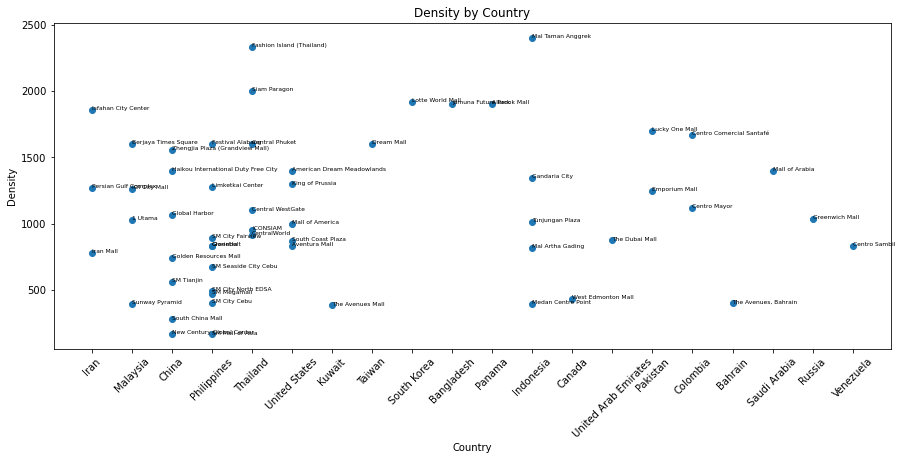

In [13]:

# Create the scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(malldata['Country'], malldata['density'])

# Add labels to each point representing the mall name
for i, mall in enumerate(malldata['Mall']):
    plt.annotate(mall, (malldata['Country'].iloc[i], malldata['density'].iloc[i]),fontsize=6)
                       
# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Density')
plt.title('Density by Country')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


In this process, I would like to analyze the density of malls by country. I found that the shopping mall with the highest density is Mal Taman Anggrek in Indonesia, while the shopping mall with the lowest density is SM Mall of Asia in the Philippines.

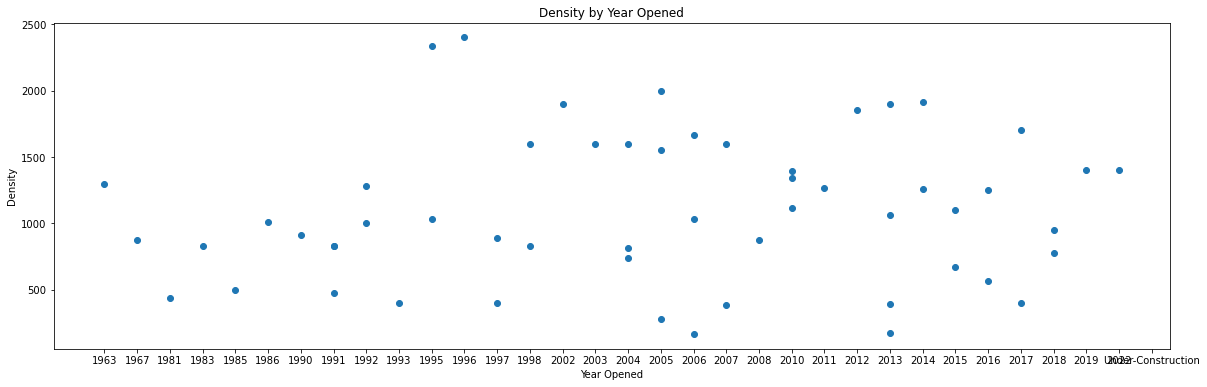

In [14]:

# Sort the data by 'Year_opened' in descending order
sorted_data = malldata.sort_values('Year_opened', ascending=False)

# Create the scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(sorted_data['Year_opened'], sorted_data['density'])

# Set the labels and title
plt.xlabel('Year Opened')
plt.ylabel('Density')
plt.title('Density by Year Opened')

# Invert the x-axis to display in descending order
plt.gca().invert_xaxis()

# Show the plot
plt.show()


I would like to analyze the density of the malls by year to observe the trend in their design. Based on the results, it appears that there is no significant effect on the mall density. However, it is important to note that drawing conclusions may be challenging due to the lack of additional information.